<a href="https://colab.research.google.com/github/hasmijalla/neuralnets/blob/main/ML_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dense
from textwrap import wrap

In [ ]:
class NeuralNet:
    # Constructor to read data
    def __init__(self, dataFile, header=True):
        self.raw_input = pd.read_csv(dataFile)
        self.raw_input.info()
        

    # TODO: Write code for pre-processing the dataset, which would include
    # standardization, normalization,
    #   categorical to numerical, etc
    def preprocess(self):
        self.X = self.raw_input.iloc[:,0:-1].values
        self.y = self.raw_input.iloc[:,-1].values

        label_encoder = LabelEncoder()
        self.raw_input['Bare Nuclei'] = label_encoder.fit_transform(self.raw_input['Bare Nuclei'])
        self.raw_input['Bare Nuclei']=self.raw_input['Bare Nuclei'].astype('str').astype('int')
        self.raw_input.info()
        print(self.raw_input.isnull().sum())
        self.data = self.raw_input
        corr = self.data.corr()
        #there are no null values in the data, so trimming the data according to null values is not necessary.
        #generating boxplot for outliers
        plt.figure(figsize = (15,9))
        sns.heatmap(data = corr, annot = True, linewidths = .5)
        self.data_trim = self.data[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bland Chromatin','Normal Nucleoli']]
        self.data_trim = preprocessing.normalize(self.data_trim)
        return 0   

    # TODO: Train and evaluate models for all combinations of parameters specified in the init method. We would like to obtain following outputs:
    #   1. Training Accuracy and Error (Loss) for every model
    #   2. Test Accuracy and Error (Loss) for every model
    #   3. History Curve (Plot of Accuracy against training steps) for all the models in a single plot. The plot should be color coded i.e.different color for each model
    def train_evaluate(self,activation_fn,hidden_layers,epoch,learning_rate):
        
        X_train, X_test, y_train, y_test = train_test_split(self.data_trim, self.y, test_size = 0.2, shuffle = False, stratify = None)
       
        model = keras.Sequential()
        model.add(Dense(32, input_dim = 7, kernel_initializer= 'normal' , activation= activation_fn))
        if hidden_layers==3:
          model.add(Dense(15, kernel_initializer= 'normal' , activation = activation_fn ))
        model.add(Dense(12, kernel_initializer= 'normal' , activation = activation_fn ))
        
        # Compile model
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
        model.compile(loss = 'mean_squared_error' , optimizer= optimizer , metrics=['accuracy'])
        history = model.fit(X_train, y_train, epochs= epoch, validation_data= (X_test,y_test), batch_size=20, verbose=0)
        y_pred = model.predict(X_test)
        pred_train= model.predict(X_train)
        train_scores = model.evaluate(X_train, y_train, verbose=0)
        print('Training Accuracy : {} \nTraining Error : {}'.format(round(train_scores[1],4), round(train_scores[0],4)))   
        
        pred_test= model.predict(X_test)
        test_scores = model.evaluate(X_test, y_test, verbose=0)
        print('Testing Accuracy : {} \nTesting Error : {}'.format(round(test_scores[1],4), round(test_scores[0],4))) 
      
        return history

    def plot_training_graph(self, logistic_history, tanh_history, relu_history, epoch, learning_rate, layers, ax):   
        ax.plot(logistic_history.history['accuracy'], color='pink', linestyle='solid')
        ax.plot(tanh_history.history['accuracy'], color='orange', linestyle='solid')
        ax.plot(relu_history.history['accuracy'], color='violet', linestyle='solid')
        ax.plot(logistic_history.history['loss'], color='pink', linestyle='dashed')
        ax.plot(tanh_history.history['loss'], color='orange', linestyle='dashed')
        ax.plot(relu_history.history['loss'], color='violet', linestyle='dashed')
        ax.set_title('Epoch='+str(epoch)+', Learning Rate='+str(learning_rate)+', Hidden Layers='+str(Layers))       

    def plot_testing_graph(self, logistic_history, tanh_history, relu_history, epoch, learning_rate, layers, ax):
        ax.plot(logistic_history.history['val_accuracy'], color='pink', linestyle='solid')
        ax.plot(tanh_history.history['val_accuracy'], color='orange', linestyle='solid')
        ax.plot(relu_history.history['val_accuracy'], color='violet', linestyle='solid')
        ax.plot(logistic_history.history['val_loss'], color='pink', linestyle='dashed')
        ax.plot(tanh_history.history['val_loss'], color='orange', linestyle='dashed')
        ax.plot(relu_history.history['val_loss'], color='pink', linestyle='dashed')
        ax.set_title('Epoch='+str(epoch)+', Learning Rate='+str(learning_rate)+', Hidden Layers='+str(layers))
          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class:                       699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns

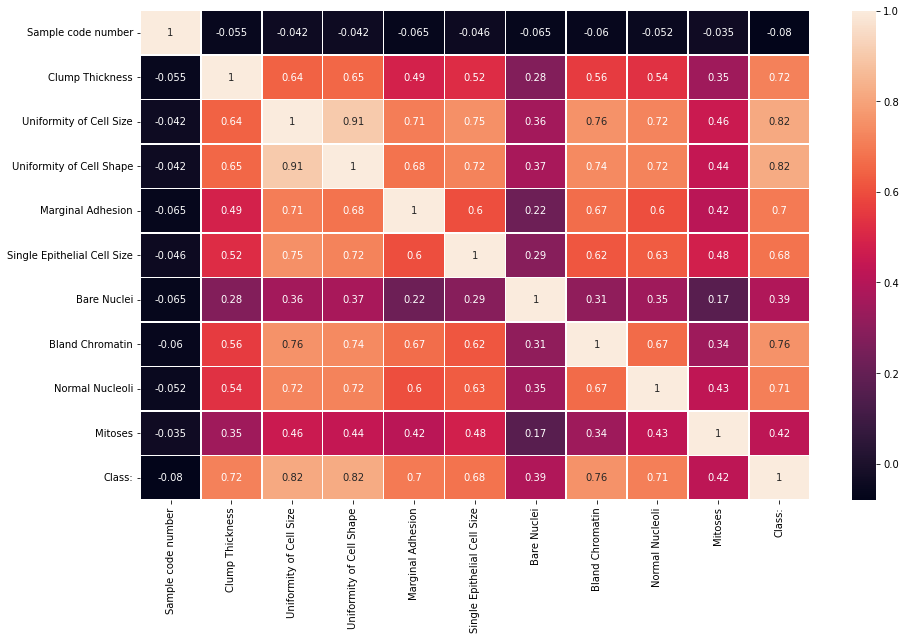

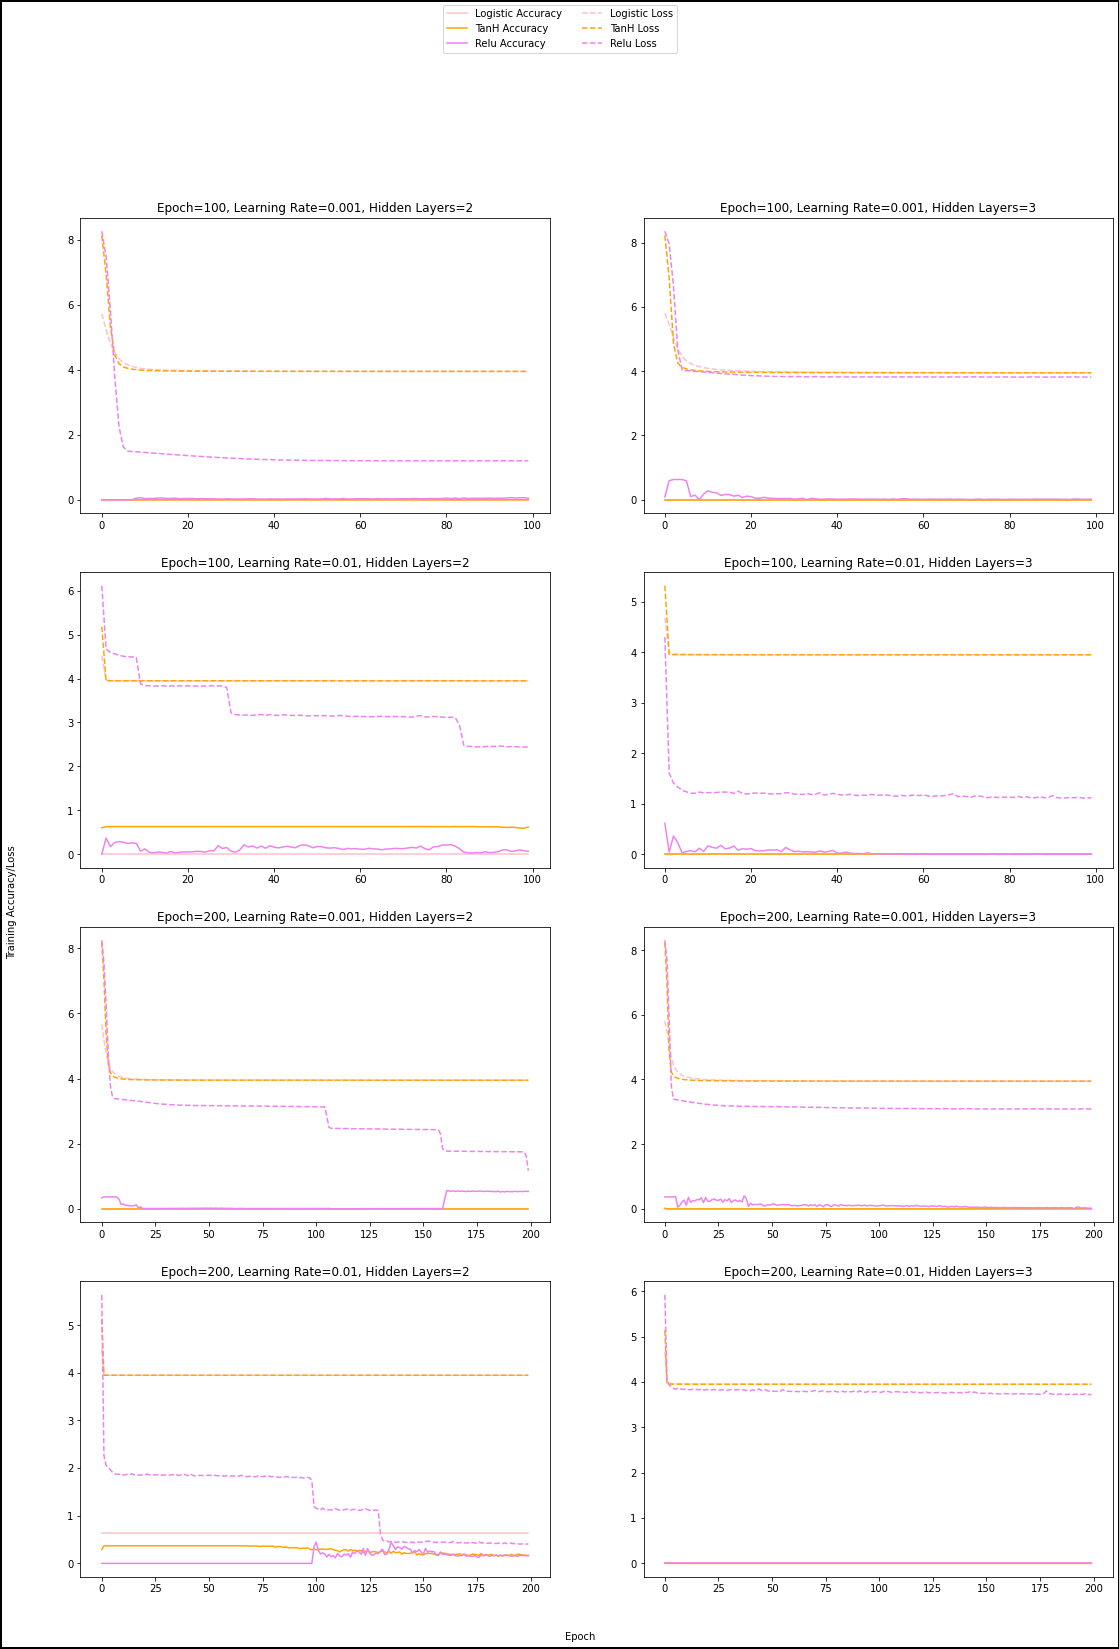

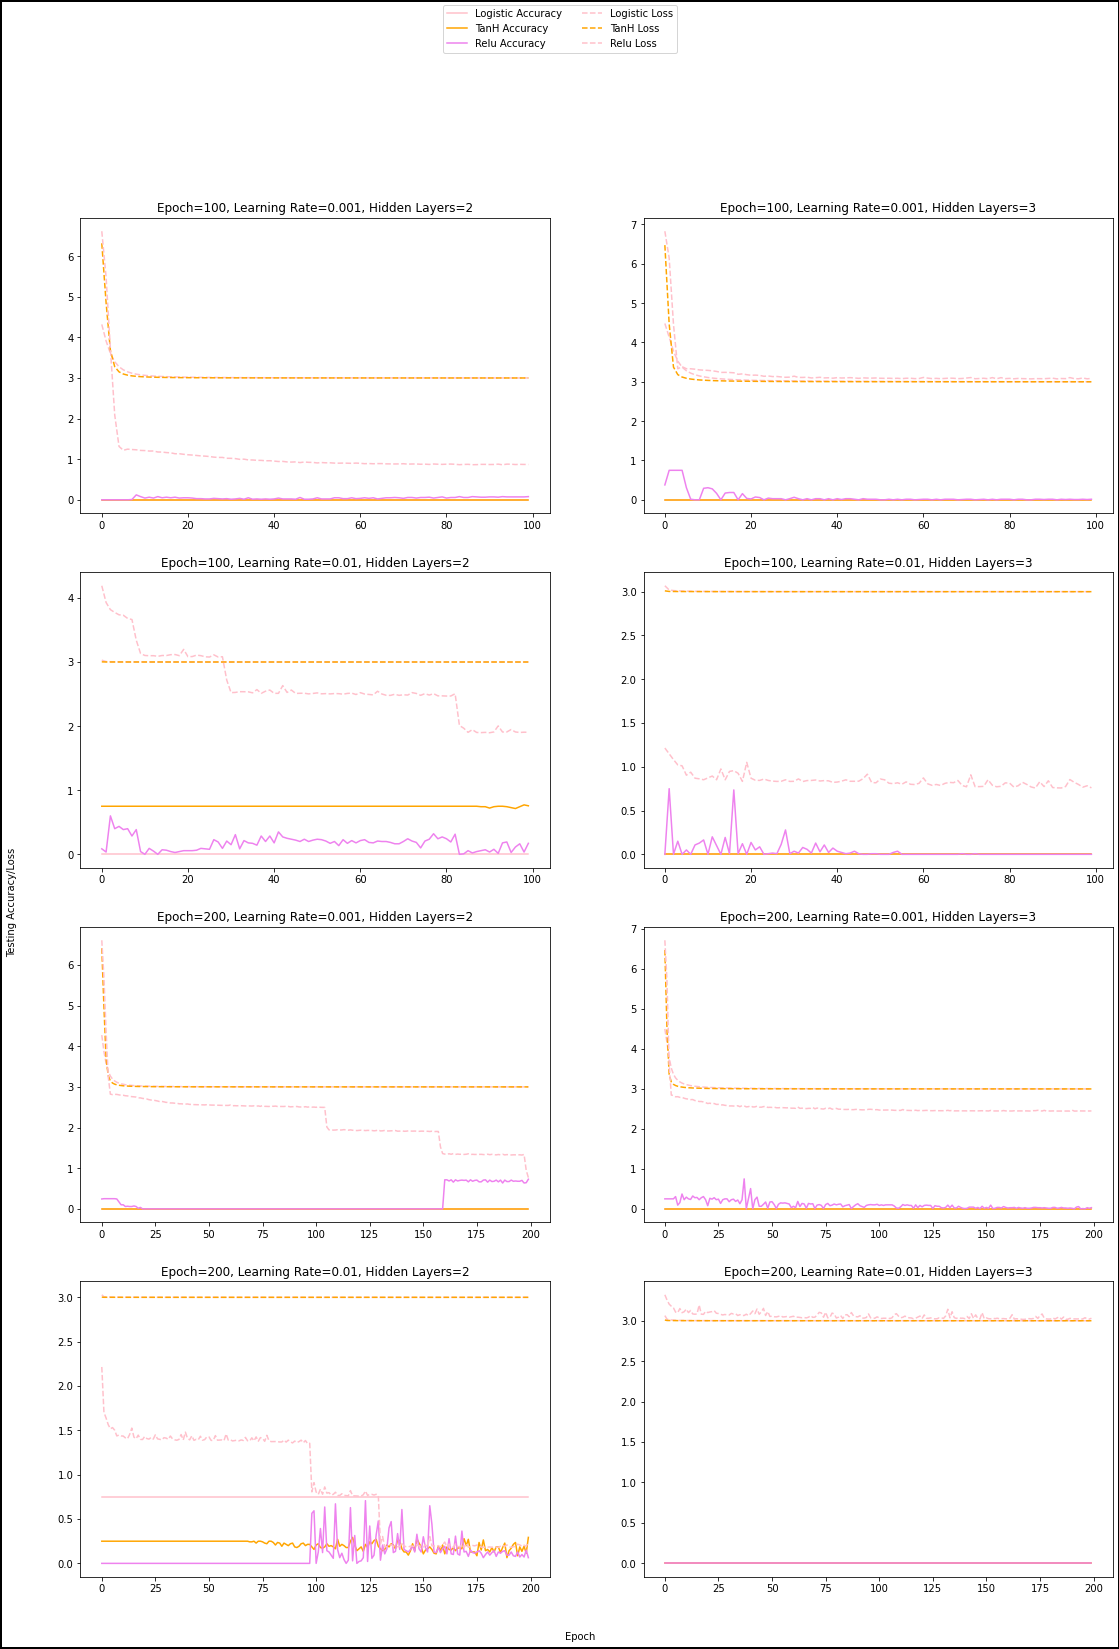

In [ ]:
if __name__ == "__main__":
    

    neural_network = NeuralNet('https://raw.githubusercontent.com/hasmijalla/neuralnets/main/breast-cancer-wisconsin.data')
    neural_network.preprocess()

    # List of hyperparameters to be used for for model evaluation
    matrix = [{'epoch' : 100, 'learning_rate' : 0.001, 'layers' : 2},
              {'epoch' : 100, 'learning_rate' : 0.001, 'layers' : 3},
              {'epoch' : 100, 'learning_rate' : 0.01, 'layers' : 2},
              {'epoch' : 100, 'learning_rate' : 0.01, 'layers' : 3},
              {'epoch' : 200, 'learning_rate' : 0.001, 'layers' : 2},
              {'epoch' : 200, 'learning_rate' : 0.001, 'layers' : 3},
              {'epoch' : 200, 'learning_rate' : 0.01, 'layers' : 2},
              {'epoch' : 200, 'learning_rate' : 0.01, 'layers' : 3},
             ]
            
    count=0;
    labels = ["Logistic Accuracy", "TanH Accuracy","Relu Accuracy","Logistic Loss","TanH Loss","Relu Loss"]

    fig1 = plt.figure(edgecolor='black', linewidth=4)
    fig2 = plt.figure(edgecolor='black', linewidth=4)

    for row in matrix:
        count=count+1
        print('\n------------------------- Case -',count, '-------------------------')
        Layers = row.get('layers')
        e = row.get('epoch')
        lr = row.get('learning_rate')
        print(f'Hidden Layers={Layers}, Epoch={e}, Learning Rate={lr}')
        print('\n-----------Logistic-----------')
        logistic_history = neural_network.train_evaluate('sigmoid',Layers,e,lr)

        print('\n-----------Tanh-----------')
        tanh_history = neural_network.train_evaluate('tanh',Layers,e,lr)

        print('\n-----------Relu-----------')
        relu_history = neural_network.train_evaluate('relu',Layers,e,lr)

        ax1 = fig1.add_subplot(4,2,count)
        ax2 = fig2.add_subplot(4,2,count)
        neural_network.plot_training_graph(logistic_history, tanh_history, relu_history, e, lr, Layers, ax1)
        neural_network.plot_testing_graph(logistic_history, tanh_history, relu_history, e, lr, Layers, ax2)

    #Plot the model history for each model in a single plot    
    fig1.legend(ax1.get_lines(), labels, ncol=2, loc="upper center")
    fig2.legend(ax2.get_lines(), labels, ncol=2, loc="upper center")

    fig1.set_size_inches(18.5, 25, forward=True)
    fig2.set_size_inches(18.5, 25, forward=True)

    fig1.text(0.5, 0.09, 'Epoch', ha='center')
    fig1.text(0.07, 0.5, 'Training Accuracy/Loss', va='center', rotation='vertical')

    fig2.text(0.5, 0.09, 'Epoch', ha='center')
    fig2.text(0.07, 0.5, 'Testing Accuracy/Loss', va='center', rotation='vertical')

    plt.show()